#  importing libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image

# gathering data 

reading **csv** file (twitter-archive-enhanced)

In [2]:
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')

reading **tsv** file (image-predictions)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open ('image-prediction.tsv',mode='wb')as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv',sep = "\t")

reading **json** file (tweet-json)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)

# assessing data 

assessing **twitter_archived**

In [6]:
twitter_archived.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None
2241,667915453470232577,NaN,NaN,2015-11-21 04:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Otis. He is a Peruvian Quartzite. Pic spo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667915453...,10,10,Otis,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None


In [7]:
twitter_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archived[twitter_archived.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [11]:
twitter_archived['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
twitter_archived['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

   **Quality issues**

1- tweet_id must be string instead of int 

2- timestamp must be date_time instead of string

3- unnecessary columns like (in_reply_to_status_id ,in_reply_to_status_id, retweeted_status_id , retweeted_status_user_id)

4-'None' values in name

5-'None' values in dog_stage

6- unnecessary rating_denominator column

7- missing values in expanded_urls


**Tidiness issues**

dogs stage have 4 columns despite it is 1 variable deserve only 1 col 

assessing **image_predictions**

In [13]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions[image_predictions[['tweet_id','jpg_url']].duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Quality issues**

1- tweet_id must be string instead of int

2- drop unnecessary all false results in p1_dog & p2_dog & p3_dog 

**api_df** assessing

In [16]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**Quality issues**

tweet_id data type must be object instead of int

**Tidiness issues**

all data must be combined in one table not separated

# cleaning data 

copying data

In [19]:
twitter_archived_clean = twitter_archived.copy()

In [20]:
image_predictions_clean = image_predictions.copy()

In [21]:
api_df_clean = api_df.copy()

### Quality cleaning 

**all quality issues** 

**twitter_archived**

1- tweet_id must be string instead of int 

2- timestamp must be date_time instead of string

3- unnecessary columns like (in_reply_to_status_id ,in_reply_to_status_id, retweeted_status_id , retweeted_status_user_id)

4-'None' values in name

5-'None' values in dog_stage

6- unnecessary rating_denominator column

7- missing values in expanded_urls


**image_predictions**

8- tweet_id must be string instead of int

9- drop unnecessary all false results in p1_dog & p2_dog & p3_dog 

**api_df**

10- tweet_id must be string instead of int


### define 
convert tweet_id from int to str.

### code

In [22]:
# 1- tweet_id must be string instead of int
twitter_archived_clean.tweet_id = twitter_archived_clean.tweet_id.astype(str)

In [23]:
# 9- tweet_id must be string instead of int
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

In [24]:
# 10-tweet_id must be string instead of int
api_df_clean.tweet_id = api_df_clean.tweet_id.astype(str)

### Test

In [25]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [27]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Define 
convert timestamp to date_time

### code


In [28]:
twitter_archived_clean.timestamp = pd.to_datetime(twitter_archived_clean.timestamp)

### Test

In [29]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define 
drop unnecessary columns

### Code

In [30]:
twitter_archived_clean = twitter_archived_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis = 1)

### Test

In [31]:
twitter_archived_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1097,736225175608430592,2016-05-27 15:58:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None


### define 
replace None with nan values 

### Code

In [32]:
twitter_archived_clean = twitter_archived_clean.replace('None',np.nan)

### Test

In [33]:
twitter_archived_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2124,670374371102445568,2015-11-27 22:51:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's rebellious. Full of teen ang...,https://twitter.com/dog_rates/status/670374371...,12,10,Daisy,NaN,NaN,NaN,NaN
140,865006731092295680,2017-05-18 00:50:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He really hopes you like his Ha...,https://twitter.com/dog_rates/status/865006731...,13,10,Nelly,NaN,NaN,NaN,NaN
630,794332329137291264,2016-11-04 00:15:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,NaN,NaN,NaN,NaN
698,786363235746385920,2016-10-13 00:29:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,NaN,NaN,NaN
2301,667044094246576128,2015-11-18 18:17:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,NaN,NaN,NaN,NaN,NaN


### Define 
drop rating dominator column .

### Code

In [34]:
twitter_archived_clean = twitter_archived_clean.drop(['rating_denominator'], axis = 1)

### Test

In [35]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2356 non-null   object             
 1   timestamp         2356 non-null   datetime64[ns, UTC]
 2   source            2356 non-null   object             
 3   text              2356 non-null   object             
 4   expanded_urls     2297 non-null   object             
 5   rating_numerator  2356 non-null   int64              
 6   name              1611 non-null   object             
 7   doggo             97 non-null     object             
 8   floofer           10 non-null     object             
 9   pupper            257 non-null    object             
 10  puppo             30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memory usage: 202.6+ KB


### Define 
remove rows for missing values in expanded_urls col

### Code

In [36]:
twitter_archived_clean = twitter_archived_clean.dropna(subset = ['expanded_urls'])

### Test

In [37]:
twitter_archived_clean.isnull().count()

tweet_id            2297
timestamp           2297
source              2297
text                2297
expanded_urls       2297
rating_numerator    2297
name                2297
doggo               2297
floofer             2297
pupper              2297
puppo               2297
dtype: int64

### Define 
drop unnecessary all false results in p1_dog & p2_dog & p3_dog

### Code

In [38]:
false = (image_predictions_clean['p1_dog']==False )& (image_predictions_clean['p2_dog'] == False)&(image_predictions_clean['p3_dog'] == False)
false_index=image_predictions_clean[false].index
image_predictions_clean=image_predictions_clean.drop(false_index)

### Test

In [39]:
image_predictions_clean[image_predictions_clean[(image_predictions_clean['p1_dog'] == False ) &
                                                (image_predictions_clean['p2_dog'] == False ) &
                                                (image_predictions_clean['p3_dog'] == False)]].count()


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

# Tidiness cleaning


## Tidiness issues

### in twitter_archived table 

dogs stage have 4 columns despite it is 1 variable deserve only 1 col 

### in all data 
all data must be combined in one table not separated

### Define
make col for every variable 

### Code 

In [40]:
twitter_archived_clean=pd.melt(twitter_archived_clean,id_vars=['tweet_id','timestamp','source','text','expanded_urls',
                                                               'rating_numerator','name'])

In [41]:
twitter_archived_clean=twitter_archived_clean.drop('variable',axis=1)
twitter_archived_clean=twitter_archived_clean.rename(columns={'value':'dog_stage'})

### Test

In [42]:
twitter_archived_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage
3329,740699697422163968,2016-06-09 00:19:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,https://twitter.com/dog_rates/status/740699697...,8,Chip,NaN
2631,831309418084069378,2017-02-14 01:09:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,12,Scooter,NaN
454,815990720817401858,2017-01-02 18:38:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,https://www.gofundme.com/surgeryforjacktheminp...,11,Jack,NaN
8403,688894073864884227,2016-01-18 01:22:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hamrick. He's covered in corn flakes. ...,https://twitter.com/dog_rates/status/688894073...,7,Hamrick,NaN
2092,669749430875258880,2015-11-26 05:28:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,https://twitter.com/dog_rates/status/669749430...,8,Clarence,NaN


### Define
combine all data in one table

### Code 

In [43]:
all_data_clean = pd.merge(twitter_archived_clean , image_predictions_clean , on = 'tweet_id' , how = 'left')

In [44]:
all_data_clean = pd.merge(all_data_clean ,api_df_clean, on = 'tweet_id' , how = 'left')

### Test

In [45]:
all_data_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
4667,878057613040115712,2017-06-23 01:10:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,Emmy,NaN,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1.0,...,0.839097,True,Boston_bull,0.078799,True,toy_terrier,0.015243,True,7181.0,42876.0
5257,787322443945877504,2016-10-15 16:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,https://twitter.com/dog_rates/status/787322443...,10,Lincoln,NaN,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1.0,...,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False,2032.0,8726.0
3116,765719909049503744,2016-08-17 01:20:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,https://twitter.com/dog_rates/status/765719909...,12,Brat,NaN,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1.0,...,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,2475.0,8021.0
8695,675531475945709568,2015-12-12 04:23:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,https://twitter.com/dog_rates/status/675531475...,10,Ellie,NaN,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1.0,...,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True,428.0,1276.0
833,762316489655476224,2016-08-07 15:56:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He specializes in mid-air freez...,https://twitter.com/dog_rates/status/762316489...,11,Scout,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1298.0,5350.0


In [46]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9188 entries, 0 to 9187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          9188 non-null   object             
 1   timestamp         9188 non-null   datetime64[ns, UTC]
 2   source            9188 non-null   object             
 3   text              9188 non-null   object             
 4   expanded_urls     9188 non-null   object             
 5   rating_numerator  9188 non-null   int64              
 6   name              6444 non-null   object             
 7   dog_stage         388 non-null    object             
 8   jpg_url           7004 non-null   object             
 9   img_num           7004 non-null   float64            
 10  p1                7004 non-null   object             
 11  p1_conf           7004 non-null   float64            
 12  p1_dog            7004 non-null   object             
 13  p2 

In [47]:
# remove nan 
all_data_clean  =  all_data_clean.dropna()

In [48]:
# changing data type to bool
all_data_clean['p1_dog']=all_data_clean['p1_dog'].astype(bool)
all_data_clean['p2_dog']=all_data_clean['p2_dog'].astype(bool)
all_data_clean['p3_dog']=all_data_clean['p3_dog'].astype(bool)

In [49]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 9 to 7939
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          171 non-null    object             
 1   timestamp         171 non-null    datetime64[ns, UTC]
 2   source            171 non-null    object             
 3   text              171 non-null    object             
 4   expanded_urls     171 non-null    object             
 5   rating_numerator  171 non-null    int64              
 6   name              171 non-null    object             
 7   dog_stage         171 non-null    object             
 8   jpg_url           171 non-null    object             
 9   img_num           171 non-null    float64            
 10  p1                171 non-null    object             
 11  p1_conf           171 non-null    float64            
 12  p1_dog            171 non-null    bool               
 13  p2  

In [50]:
all_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0
42,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128.0,20771.0
105,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628.0,20730.0
117,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327.0,16476.0
201,851953902622658560,2017-04-12 00:23:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,Astrid,doggo,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,10706.0,0.0


In [51]:
# reset index after combining
all_data_clean = all_data_clean.reset_index(drop=True)

In [52]:
# test
all_data_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128.0,20771.0
2,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628.0,20730.0
3,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327.0,16476.0
4,851953902622658560,2017-04-12 00:23:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,Astrid,doggo,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,10706.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,787717603741622272,2016-10-16 18:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,Tonks,puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3.0,...,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True,3240.0,11416.0
167,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,Cooper,puppo,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1.0,...,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,1480.0,5610.0
168,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,716.0,3277.0
169,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,...,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,1366.0,4624.0


### Now we have clean data  

# Visualization


dog stages percentage

In [53]:
dog_stage_pie=all_data_clean['dog_stage'].value_counts()

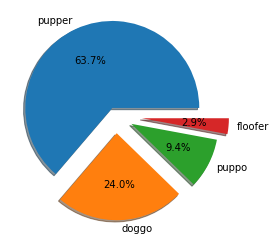

In [54]:
plt.pie(dog_stage_pie,labels=['pupper','doggo','puppo','floofer'],shadow=True,explode=(.1,.2,.2,.3),autopct='%1.1f%%')
plt.show()

then we have the majority is **pupper**

and the min percent is **floofer**

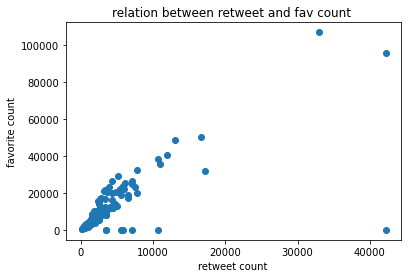

In [55]:
plt.scatter(all_data_clean.retweet_count,all_data_clean.favorite_count)
plt.title('relation between retweet and fav count ')
plt.xlabel('retweet count ')
plt.ylabel('favorite count')
plt.show()

we have **positive** corelation between retweet count and favorate count

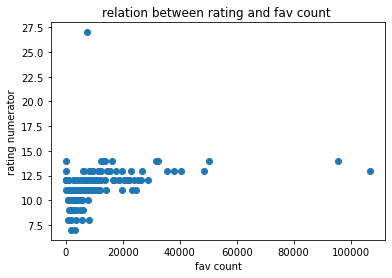

In [56]:
plt.scatter(all_data_clean.favorite_count,all_data_clean['rating_numerator'])
plt.title('relation between rating and fav count ')
plt.xlabel('fav count')
plt.ylabel('rating numerator')
plt.show()

there is no  relation between  favorite_count and rating_numerator

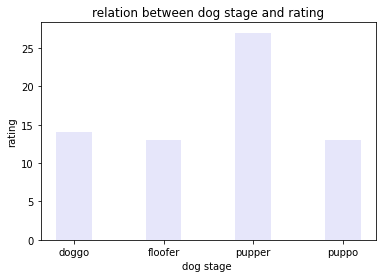

In [57]:
plt.bar(all_data_clean['dog_stage'],all_data_clean['rating_numerator'], color ='lavender', width = 0.4)
 
plt.xlabel("dog stage ")
plt.ylabel("rating")
plt.title("relation between dog stage and rating")
plt.show()

pupper is the highest in the rating

# Storing 

In [58]:
all_data_clean.to_csv(r'C:\Users\youss\OneDrive\Documents\twitter_archive_master.csv', index = False)